In [2]:
import scanpy as sc
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import sys
sys.path.append('/SGCAST_downloadpath/SGCAST')
from utils.utils import refine_high
import gseapy

<AxesSubplot:title={'center':'SGCAST'}, xlabel='spatial1', ylabel='spatial2'>

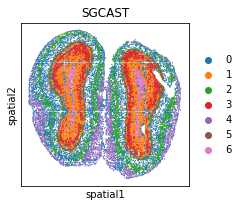

In [3]:
base_path = '/SGCAST_downloadpath/SGCAST/output'
ID ='Stereo-seq'

file_name = "training_intput_data_path/"+ID+"/"+ID+".h5ad"
spots_embeddings = np.loadtxt(os.path.join(base_path, ID + '_embeddings.txt'))
stage = ID
adata = sc.read_h5ad(file_name)
adata.obsm['embedding'] = np.float32(spots_embeddings)
n_neighbors = 30 
sc.pp.neighbors(adata, use_rep='embedding', n_neighbors=n_neighbors) 
resolution = 1.2  
sc.tl.louvain(adata,  resolution=resolution)  
# del spots_embeddings
size = 6
figsize = (3, 3) 
plt.rcParams["figure.figsize"] = figsize
sc.pl.embedding(adata, basis="spatial", color="louvain", s=size, show=False,
                title='SGCAST')  


<AxesSubplot:title={'center':'SGCAST'}, xlabel='spatial1', ylabel='spatial2'>

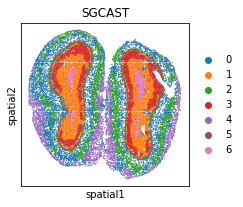

In [4]:
###########refine
sc.pp.neighbors(adata, use_rep='spatial', n_neighbors=n_neighbors, key_added="pixel")
arr = adata.obsp['pixel_connectivities']
arr = arr.astype('int32')
pred = adata.obs["louvain"].astype('int32')
refined_pred = refine_high(pred=np.array(pred.tolist()), dis=arr, option=False)
adata.obs["refined_pred"] = refined_pred
adata.obs["refined_pred"] = adata.obs["refined_pred"].astype('category')
plt.rcParams["figure.figsize"] = figsize
sc.pl.embedding(adata, basis="spatial", color="refined_pred", s=size, show=False,
                title='SGCAST') 